In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ptitprince as pt

# On fixe la graine
random.seed(42)

In [2]:
data=pd.read_csv("data_seed2.txt", sep="\t", decimal=",", dtype="object")
data.columns = data.columns.str.lower()
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
0,202 410,9 201 003 869,"0,00","800,00","0,00","0,00","0,00","800,00","0,00","0,00",...,"-47 333,00","-13 333,00","0,00","92,00","262,00","5,00",0,"0,00",0,2
1,202 410,9 599 624 616,"1 152,00","200,00","0,00","0,00","1 755,00","200,00","0,00","0,00",...,"-3 333,00","-3 000,00","1 000,00","71,00","321,00","54,00",0,"1 000,00",0,2
2,202 412,1 413 515 491,"87 805,00","6 680,61","1,00","1,00","76 354,00","6 738,46","1,00","1,00",...,"220 333,00","146 666,00","157 084,00","0,00","13,00","0,00",0,"157 084,00",0,2
3,202 404,1 600 773 833,"2 468,00","200,00","0,00","0,00","2 534,00","200,00","0,00","0,00",...,"3 666,00","8 333,00","57 333,00","12,00","17,00","0,00",0,"57 333,00",0,2
4,202 409,2 661 466 041,"513 708,00","1 000,00","0,00","0,00","257 317,00","1 000,00","0,00","0,00",...,"370 333,00","210 666,00","0,00","9,00","247,00","60,00",0,"0,00",0,2


In [4]:
##présence de données manquantes
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
345,202 410,5 510 074 447,"14 473,00","117 279,66","0,00","0,00","19 523,00","117 912,64","0,00","0,00",...,?,?,?,?,?,?,?,?,0,2


In [5]:
any(data.isna().sum())

False

In [6]:
data.dtypes

datdelhis_mm0         object
numtecprs             object
sldcrdmms_sum_mm1     object
engagement_sum_mm1    object
top_pret_conso_mm1    object
                       ...  
crtad_ag_nbjde_bc     object
topcptlitig           object
somme_encours         object
cible                 object
rnd_1_20              object
Length: 130, dtype: object

In [7]:
def convert_if_numeric(col):
    if col.dtype == "object":
        # Supprimer tous les espaces, y compris espace insécable
        cleaned = col.str.replace("\u202f", "")
        # Remplacer la virgule décimale par un point
        cleaned = cleaned.str.replace(",", ".")
        # Essayer de convertir en numérique
        numeric_col = pd.to_numeric(cleaned, errors="coerce")
        # Si au moins une valeur numérique existe, on remplace la colonne
        if numeric_col.notna().any():
            return numeric_col
    return col

# Appliquer la fonction à toutes les colonnes
data = data.apply(convert_if_numeric)
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
0,202410,9201003869,0.0,800.00,0.0,0.0,0.0,800.00,0.0,0.0,...,-47333.0,-13333.0,0.0,92.0,262.0,5.0,0.0,0.0,0,2
1,202410,9599624616,1152.0,200.00,0.0,0.0,1755.0,200.00,0.0,0.0,...,-3333.0,-3000.0,1000.0,71.0,321.0,54.0,0.0,1000.0,0,2
2,202412,1413515491,87805.0,6680.61,1.0,1.0,76354.0,6738.46,1.0,1.0,...,220333.0,146666.0,157084.0,0.0,13.0,0.0,0.0,157084.0,0,2
3,202404,1600773833,2468.0,200.00,0.0,0.0,2534.0,200.00,0.0,0.0,...,3666.0,8333.0,57333.0,12.0,17.0,0.0,0.0,57333.0,0,2
4,202409,2661466041,513708.0,1000.00,0.0,0.0,257317.0,1000.00,0.0,0.0,...,370333.0,210666.0,0.0,9.0,247.0,60.0,0.0,0.0,0,2


In [88]:
data.somme_encours[data.somme_encours.isna()]

345     NaN
1278    NaN
3906    NaN
6304    NaN
7128    NaN
7855    NaN
8607    NaN
9092    NaN
9136    NaN
10510   NaN
10568   NaN
11831   NaN
12762   NaN
13432   NaN
16825   NaN
17771   NaN
18790   NaN
19397   NaN
20057   NaN
20195   NaN
23267   NaN
24788   NaN
25569   NaN
26716   NaN
28265   NaN
29025   NaN
30900   NaN
34166   NaN
36875   NaN
37959   NaN
38729   NaN
41665   NaN
42383   NaN
44016   NaN
44900   NaN
45571   NaN
45623   NaN
46557   NaN
47199   NaN
48298   NaN
Name: somme_encours, dtype: float64

In [8]:
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
345,202410,5510074447,14473.0,117279.66,0.0,0.0,19523.0,117912.64,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2


In [12]:
##variables ont des NA
var_with_na=data.isna().sum()
var_with_na[var_with_na>0]

sldcrdmms_sum_mm1     110
engagement_sum_mm1    110
top_pret_conso_mm1    110
nbr_pret_conso_mm1    110
sldcrdmms_sum_mm2     194
                     ... 
crtad_ag_nbjde_bb      40
crtad_ag_nbjde_ba      40
crtad_ag_nbjde_bc      40
topcptlitig            40
somme_encours          40
Length: 92, dtype: int64

In [13]:
data.dtypes

datdelhis_mm0           int64
numtecprs               int64
sldcrdmms_sum_mm1     float64
engagement_sum_mm1    float64
top_pret_conso_mm1    float64
                       ...   
crtad_ag_nbjde_bc     float64
topcptlitig           float64
somme_encours         float64
cible                   int64
rnd_1_20                int64
Length: 130, dtype: object

In [14]:
data.dtypes.value_counts()

float64    118
int64       11
object       1
Name: count, dtype: int64

In [43]:
##reperer les colonnes constantes
def all_constant_columns(df):
    result=[]
    for col in df.columns:
        if df[col].nunique() == 1:
            result.append(col)
    return result
all_constant_columns(data)

['indrskdtx', 'ratio_mensu_imo_solde_dbtsum', 'rnd_1_20']

In [44]:
y=data.cible
X=data.drop(all_constant_columns(data)+["cible","datdelhis_mm0", "numtecprs"], axis=1) ##on supprime les variables d'identification

In [ ]:

data.to_csv("data_with_na_explicited.csv", sep=";", header=True)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20 % des données pour le test
    random_state=42,     # pour reproductibilité (comme set.seed en R)
    stratify=y
)

In [ ]:
##Création des transformations de variables

In [46]:
X_train.describe()

,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,sldcrdmms_sum_mm3,top_pret_conso_mm3,...,ndb_modele_mm3_mm1_sum,crtad_ag_solde_t,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours
count,4.315600e+04,4.315600e+04,43156.000000,43156.000000,4.309300e+04,4.309300e+04,43093.000000,43093.000000,4.301800e+04,43018.000000,...,42980.000000,4.320900e+04,4.320900e+04,4.320900e+04,4.320800e+04,43209.000000,43209.000000,43209.000000,43209.000000,4.320900e+04
mean,2.888081e+05,5.587023e+04,0.201015,0.250046,2.907512e+05,5.593082e+04,0.201170,0.249623,2.903638e+05,0.200474,...,0.001024,6.531809e+05,6.583670e+05,6.652917e+05,3.341192e+06,16.850101,80.454095,15.369067,0.000139,3.341115e+06
std,1.977430e+06,1.600712e+05,0.400764,0.556333,1.911278e+06,1.602908e+05,0.400879,0.554590,1.893145e+06,0.400360,...,0.050118,3.075167e+06,2.987290e+06,2.992257e+06,3.112401e+07,28.744881,130.779969,27.772614,0.011783,3.112365e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,-3.357450e+08,-3.214533e+08,-3.243515e+08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.239100e+04,5.000000e+02,0.000000,0.000000,1.245600e+04,5.000000e+02,0.000000,0.000000,1.256625e+04,0.000000,...,0.000000,2.916600e+04,2.850000e+04,2.883300e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.665000e+04,1.602970e+03,0.000000,0.000000,4.676800e+04,1.600000e+03,0.000000,0.000000,4.652950e+04,0.000000,...,0.000000,1.116660e+05,1.113330e+05,1.118330e+05,2.220000e+05,0.000000,9.000000,0.000000,0.000000,2.220000e+05
75%,1.693988e+05,3.565920e+04,0.000000,0.000000,1.697740e+05,3.520686e+04,0.000000,0.000000,1.697215e+05,0.000000,...,0.000000,3.940000e+05,3.980000e+05,3.981660e+05,2.140122e+06,23.000000,111.000000,18.000000,0.000000,2.139749e+06
max,3.140236e+08,1.200133e+07,1.000000,7.000000,3.039003e+08,1.200018e+07,1.000000,7.000000,3.140389e+08,1.000000,...,3.000000,1.976322e+08,1.496978e+08,1.536060e+08,5.581015e+09,266.000000,1321.000000,313.000000,1.000000,5.581015e+09


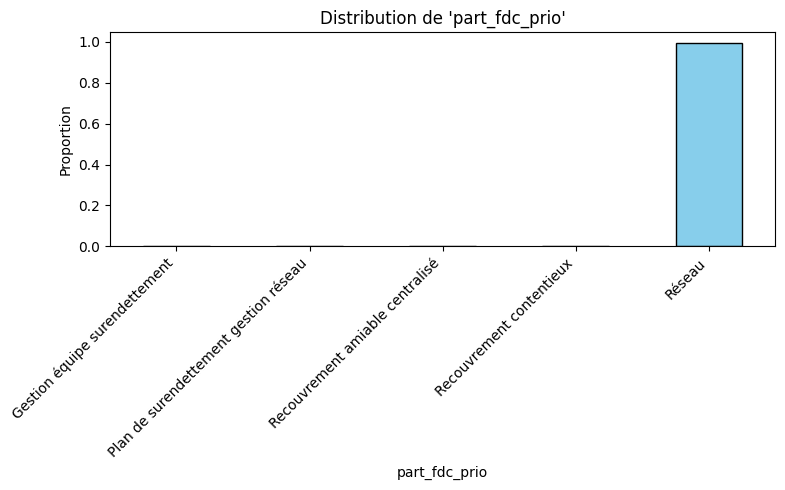

In [47]:
def plot_categorical_distribution(df, var, target=None):
    plt.figure(figsize=(8, 5))

    if target is None:
        # Distribution simple
        df[var].value_counts(normalize=True).sort_index().plot(
            kind='bar', color='skyblue', edgecolor='black'
        )
        plt.title(f"Distribution de '{var}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
    else:
        # Distribution par classe cible
        prop_df = (
            df.groupby([var, target])
              .size()
              .groupby(level=0)
              .apply(lambda x: x / x.sum())
              .unstack()
        )

        prop_df.plot(kind='bar', stacked=False, color=['lightcoral', 'skyblue'], edgecolor='black')
        plt.title(f"Distribution de '{var}' selon '{target}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
        plt.legend(title=target)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(data,'part_fdc_prio')

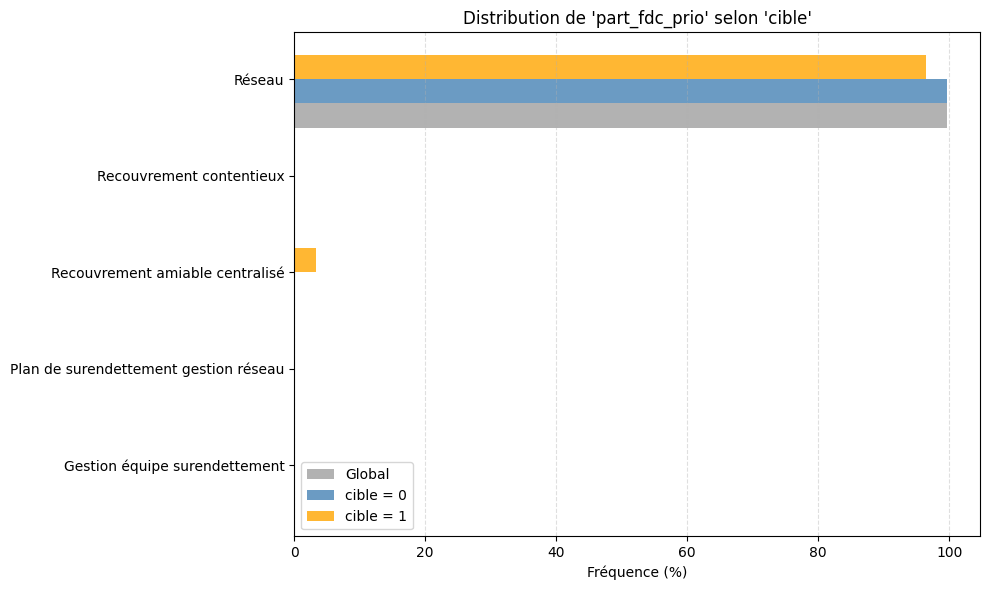

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_grouped_horizontal_bars(data, col, target, title=None, colors=None):
    """
    Trace un barplot horizontal groupé :
    - une barre pour la distribution globale
    - une pour chaque modalité de la variable cible (max 2)
    """
    # Copie et remplacement des NaN
    df = data[[col, target]].copy()
    df[col] = df[col].fillna("Manquant")
    df[target] = df[target].fillna("Manquant")

    # Comptage global (%)
    global_counts = df[col].value_counts(normalize=True).sort_index() * 100
    categories = global_counts.index

    # Comptage par modalité du target (on limite à 2 modalités)
    target_modalities = df[target].unique()
    if len(target_modalities) > 2:
        print(f"⚠️ Attention : {target} a {len(target_modalities)} modalités. Seules les deux premières seront tracées.")
        target_modalities = target_modalities[:2]

    counts_by_target = {
        t: df[df[target] == t][col].value_counts(normalize=True).reindex(global_counts.index, fill_value=0) * 100
        for t in target_modalities
    }

    # Couleurs
    if colors is None:
        colors = ["gray", "steelblue", "orange"]

    # Positionnement des barres côte à côte
    y = np.arange(len(categories))
    bar_height = 0.25

    plt.figure(figsize=(10, 6))

    # Barre globale
    plt.barh(y - bar_height, global_counts, height=bar_height, color=colors[0], label="Global", alpha=0.6)

    # Barres par modalité du target
    for i, t in enumerate(target_modalities):
        plt.barh(y + i * bar_height, counts_by_target[t], height=bar_height, 
                 color=colors[i + 1], label=f"{target} = {t}", alpha=0.8)

    # Mise en forme
    plt.yticks(y + bar_height / 2, categories)
    plt.xlabel("Fréquence (%)")
    plt.title(title if title else f"Distribution de '{col}' selon '{target}'")
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_grouped_horizontal_bars(data, "part_fdc_prio", "cible")

In [89]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

def cramers_v(data, x, y, seuil=5):
    # Table de contingence
    data2= data[[x, y]].dropna()
    table = pd.crosstab(data2[x], data2[y])
    # Test du chi-deux
    chi2, _, _, expected = chi2_contingency(table)
    # Calcul du V de Cramer
    n = table.sum().sum()
    k = min(table.shape) - 1
    v = np.sqrt(chi2 / (n * k))
    validite=False
    if (expected >= seuil).all():
        validite=True
    return v, validite

def kruskal_by_target(df, col_quanti, col_cible):
    # Séparer les groupes selon la cible
    data = df[[col_quanti, col_cible]].dropna()
    group0 = data[data[col_cible] == 0][col_quanti]
    group1 = data[data[col_cible] == 1][col_quanti]

    # Effectuer le test de Kruskal-Wallis
    stat, p_value = kruskal(group0, group1)
    return stat, p_value

def analyze_features(df, col_cible):
    results = []

    for col in df.columns:
        if col == col_cible:
            continue

        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Variable catégorielle → V de Cramer
            v, validite = cramers_v(df, col, col_cible)
            if validite:
                results.append({'var': col, 'type': 'v_cramer', 'value': v})
            else: 
                results.append({'var': col, 'type': 'v_cramer_non_valide', 'value': v})
        else:
            # Variable numérique → p-value Kruskal-Wallis
            try:
                stat, _ = kruskal_by_target(df, col, col_cible)
                results.append({'var': col, 'type': 'stat_kruskal_wallis', 'value': stat})
            except Exception:
                print(f"Colonne à problème {col}")
    return pd.DataFrame(results)

In [97]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
first_var_selection=analyze_features(df_train, "cible")
first_var_selection

,var,type,value
0,sldcrdmms_sum_mm1,stat_kruskal_wallis,921.319957
1,engagement_sum_mm1,stat_kruskal_wallis,129.097206
2,top_pret_conso_mm1,stat_kruskal_wallis,24.001788
3,nbr_pret_conso_mm1,stat_kruskal_wallis,23.972213
4,sldcrdmms_sum_mm2,stat_kruskal_wallis,873.135630
...,...,...,...
119,crtad_ag_nbjde_bb,stat_kruskal_wallis,832.577788
120,crtad_ag_nbjde_ba,stat_kruskal_wallis,720.204608
121,crtad_ag_nbjde_bc,stat_kruskal_wallis,368.642585
122,topcptlitig,stat_kruskal_wallis,45.285742


In [104]:
## les variabes qualitatives
first_var_selection[first_var_selection["type"]!="stat_kruskal_wallis"]

,var,type,value
107,part_fdc_prio,v_cramer_non_valide,0.10927


In [99]:
#Il y a un probleme avec la variable qualitative, car le test est non vérifié
table = pd.crosstab(df_train["part_fdc_prio"], df_train["cible"])
table

cible,0,1
part_fdc_prio,,
Gestion équipe surendettement,9,0
Plan de surendettement gestion réseau,73,1
Recouvrement amiable centralisé,42,22
Recouvrement contentieux,1,0
Réseau,42524,570


In [100]:
##La modalité Reseau semble prépondérante, on va regrouper les autres modalités
def regrouper_modalites(df, colonne, modalite_a_garder, nouvelle_modalite="Autres"):
    df = df.copy()
    df[colonne] = df[colonne].apply(lambda x: x if x == modalite_a_garder else nouvelle_modalite)
    return df

In [ ]:
##Je retiens Reseau comme modalité fixe et les autres je les mets en Autres
df_train=regrouper_modalites(df_train, "part_fdc_prio", "Réseau")

In [105]:
table2 = pd.crosstab(df_train["part_fdc_prio"], df_train["cible"])
table2

cible,0,1
part_fdc_prio,,
Autres,125,23
Réseau,42524,570


In [103]:
first_var_selection2=analyze_features(df_train, "cible")
first_var_selection2[first_var_selection2["type"]!="stat_kruskal_wallis"]

,var,type,value
107,part_fdc_prio,v_cramer_non_valide,0.069697


In [106]:
##On constate que même là le test n'est pas valide, donc on va recourir au test deFisher Exact
from scipy.stats import chi2_contingency, fisher_exact
odds, p_fisher = fisher_exact(table2)
print("p-value Fisher :", p_fisher)

p-value Fisher : 9.980873985656826e-18


In [ ]:
##Finalement, cette variable semble être influente pour le risque de défaut, on va la conserver

In [125]:
def plot_regle_du_coude(noms_variables, valeurs_stat, titre="Règle du coude", tri=True):
    if tri:
        data = sorted(zip(noms_variables, valeurs_stat), key=lambda x: x[1], reverse=False)
        noms_variables, valeurs_stat = zip(*data)
    
    # Création du graphique
    plt.figure(figsize=(5, 20))
    plt.barh(noms_variables, valeurs_stat)
    
    # Mise en forme
    plt.title(titre, fontsize=13)
    plt.xlabel("Variables", fontsize=11)
    plt.ylabel("Valeur stat", fontsize=11)
    
    plt.tight_layout()
    plt.show()

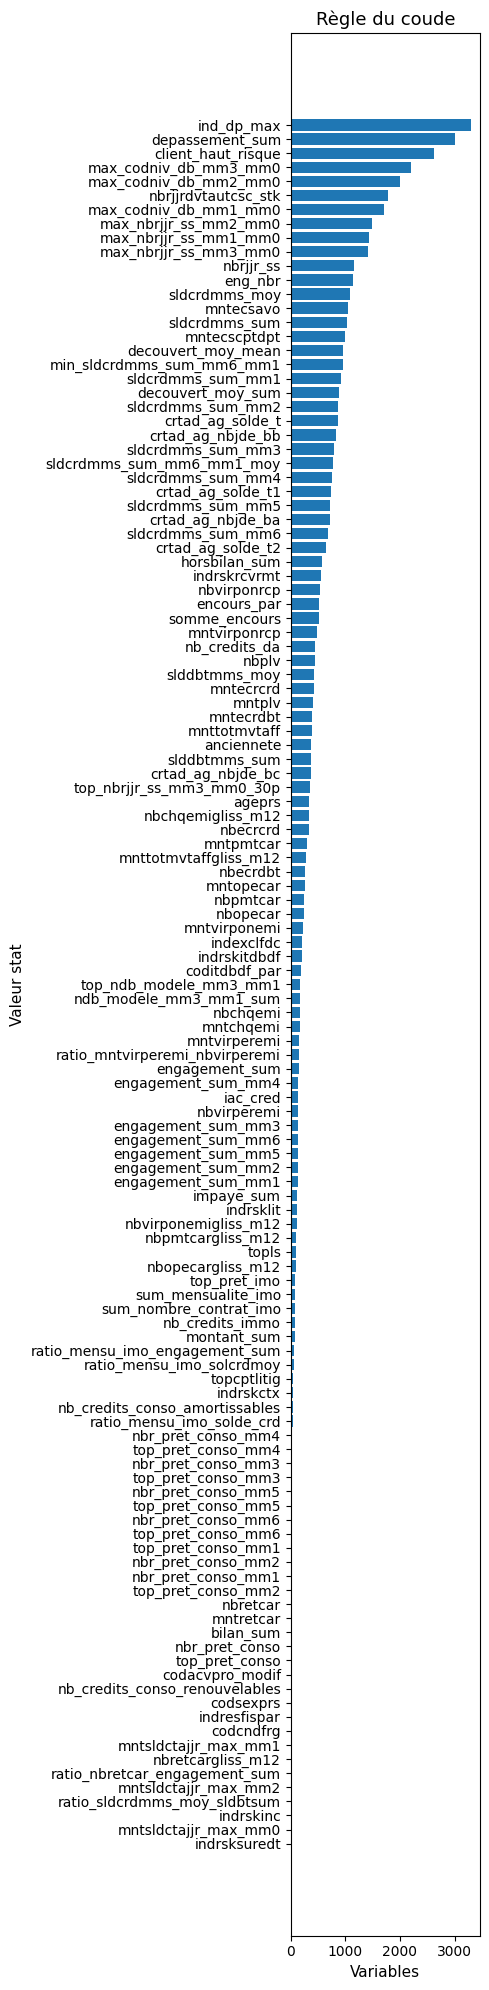

In [126]:
col_names=list(first_var_selection2[first_var_selection2["type"]=="stat_kruskal_wallis"]["var"])
valeurs_stat=list(first_var_selection2[first_var_selection2["type"]=="stat_kruskal_wallis"]["value"])
plot_regle_du_coude(col_names, valeurs_stat, titre="Règle du coude", tri=True)

In [107]:
#retenir les valeurs numeriques par la règle du Coude sur les cumuls des stats de Krukall


In [ ]:
##Etapes à venir
##Faire la discretisation
#Sélectionner les variables selon après discrétisation
#Lancer le modèle logistique
#Faire le tableau
##Calculer les performances

Seuils trouvés par l'arbre : [22.5 37.5 47.5]


[Text(0.3333333333333333, 0.875, 'x[0] <= 22.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 37.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 47.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

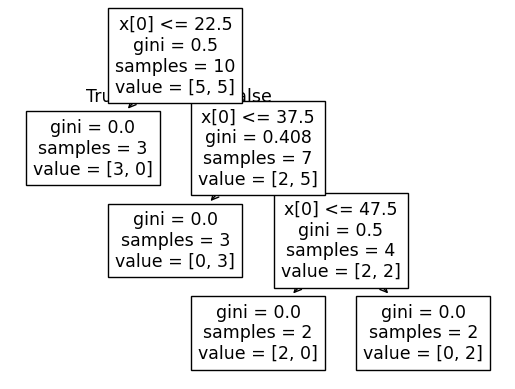

In [ ]:
##discretisation avec les arbres
def discretize_with_tree(df, col, cible, max_depth=10):
    # Arbre de décision profondeur 2
    X=df[col]
    y=df[cible]
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)

    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    thresholds = np.sort(thresholds)
    return thresholds, np.digitize(df[col], bins=thresholds)

##discretisation avec les centiles
def discretize_with_centiles(df, col, cible):
    
##discretisation avec WOE
def discretize_with_WOE(df, col, cible):

In [86]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def discretize_supervised(df2, col_quanti, col_cible, min_size_ratio=0.05, min_diff_rate=0.3, max_depth=3):
    df=df2.copy()
    X = df[[col_quanti]].values
    y = df[col_cible].values
    
    # Arbre de décision supervisé
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)
    
    # Extraire les seuils internes
    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    thresholds = np.sort(thresholds)
    
    # Discrétisation initiale
    df['bin'] = np.digitize(df[col_quanti], bins=thresholds)
    
    # Vérification des contraintes
    total = len(df)
    valid = False
    
    while not valid:
        valid = True
        counts = df['bin'].value_counts(normalize=True)
        rates = df.groupby('bin')[col_cible].mean()
        
        # Vérifier l'effectif minimum
        for b, ratio in counts.items():
            if ratio < min_size_ratio:
                valid = False
                # Fusionner la modalité avec la plus proche
                if b > 0:
                    df['bin'] = df['bin'].replace(b, b-1)
                else:
                    df['bin'] = df['bin'].replace(b, b+1)
        
        # Vérifier la différence minimale du taux cible
        rates = df.groupby('bin')[col_cible].mean()
        rates_sorted = rates.sort_values()
        for i in range(1, len(rates_sorted)):
            diff_rel = abs(rates_sorted.iloc[i] - rates_sorted.iloc[i-1]) / rates_sorted.iloc[i-1]
            if diff_rel < min_diff_rate:
                valid = False
                # Fusionner les modalités trop proches
                df['bin'] = df['bin'].replace(rates_sorted.index[i], rates_sorted.index[i-1])
                
        # Re-indexer les bins consécutivement
        unique_bins = sorted(df['bin'].unique())
        mapping = {b:i for i,b in enumerate(unique_bins)}
        df['bin'] = df['bin'].map(mapping)
    
    return df


In [87]:
discretize_supervised(df_train, "sldcrdmms_sum_mm1", "cible", min_size_ratio=0.05, min_diff_rate=0.3, max_depth=3)

,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,sldcrdmms_sum_mm3,top_pret_conso_mm3,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,bin
15756,106951.0,4592.44,1.0,1.0,22474.0,4693.10,1.0,1.0,19980.0,1.0,...,134666.0,220333.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
31387,64980.0,200.00,0.0,0.0,81320.0,215.00,0.0,0.0,84187.0,0.0,...,251333.0,226333.0,1260333.0,0.0,0.0,0.0,0.0,1260333.0,0,3
39810,623456.0,64.46,0.0,0.0,660926.0,109.74,0.0,0.0,638187.0,0.0,...,1703333.0,488000.0,24348887.0,0.0,0.0,0.0,0.0,24348887.0,0,3
46555,1271.0,200.00,0.0,0.0,2541.0,200.00,0.0,0.0,951.0,0.0,...,7333.0,54000.0,102032.0,9.0,13.0,0.0,0.0,102032.0,0,0
30794,406.0,900.00,0.0,0.0,2383.0,900.00,0.0,0.0,1848.0,0.0,...,-16333.0,-9000.0,0.0,55.0,252.0,40.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,83815.0,1000.00,0.0,0.0,87301.0,1000.00,0.0,0.0,77669.0,0.0,...,109833.0,70333.0,184000.0,0.0,1.0,1.0,0.0,184000.0,0,3
12961,51696.0,1700.00,0.0,0.0,39782.0,1700.00,0.0,0.0,55412.0,0.0,...,84167.0,182500.0,26000.0,32.0,376.0,81.0,0.0,26000.0,0,3
35382,7380.0,1508.11,0.0,0.0,10151.0,1508.89,0.0,0.0,8265.0,0.0,...,6333.0,12666.0,93333.0,49.0,230.0,39.0,0.0,93333.0,0,1
10171,703.0,551.03,0.0,0.0,531.0,549.46,0.0,0.0,2850.0,0.0,...,-21333.0,9333.0,0.0,85.0,222.0,0.0,0.0,0.0,0,0
